In [35]:
%reload_ext autoreload
%autoreload 2

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'tip_cells': [Point(1,1)],
               'attractor_cells': initial_states.Attractors}
grid = Grid(width=100, height=100, init_config=init_config)
engine = Engine(init_grid=grid, generations=36)
engine.run()

NameError: name 'ContextRequest' is not defined

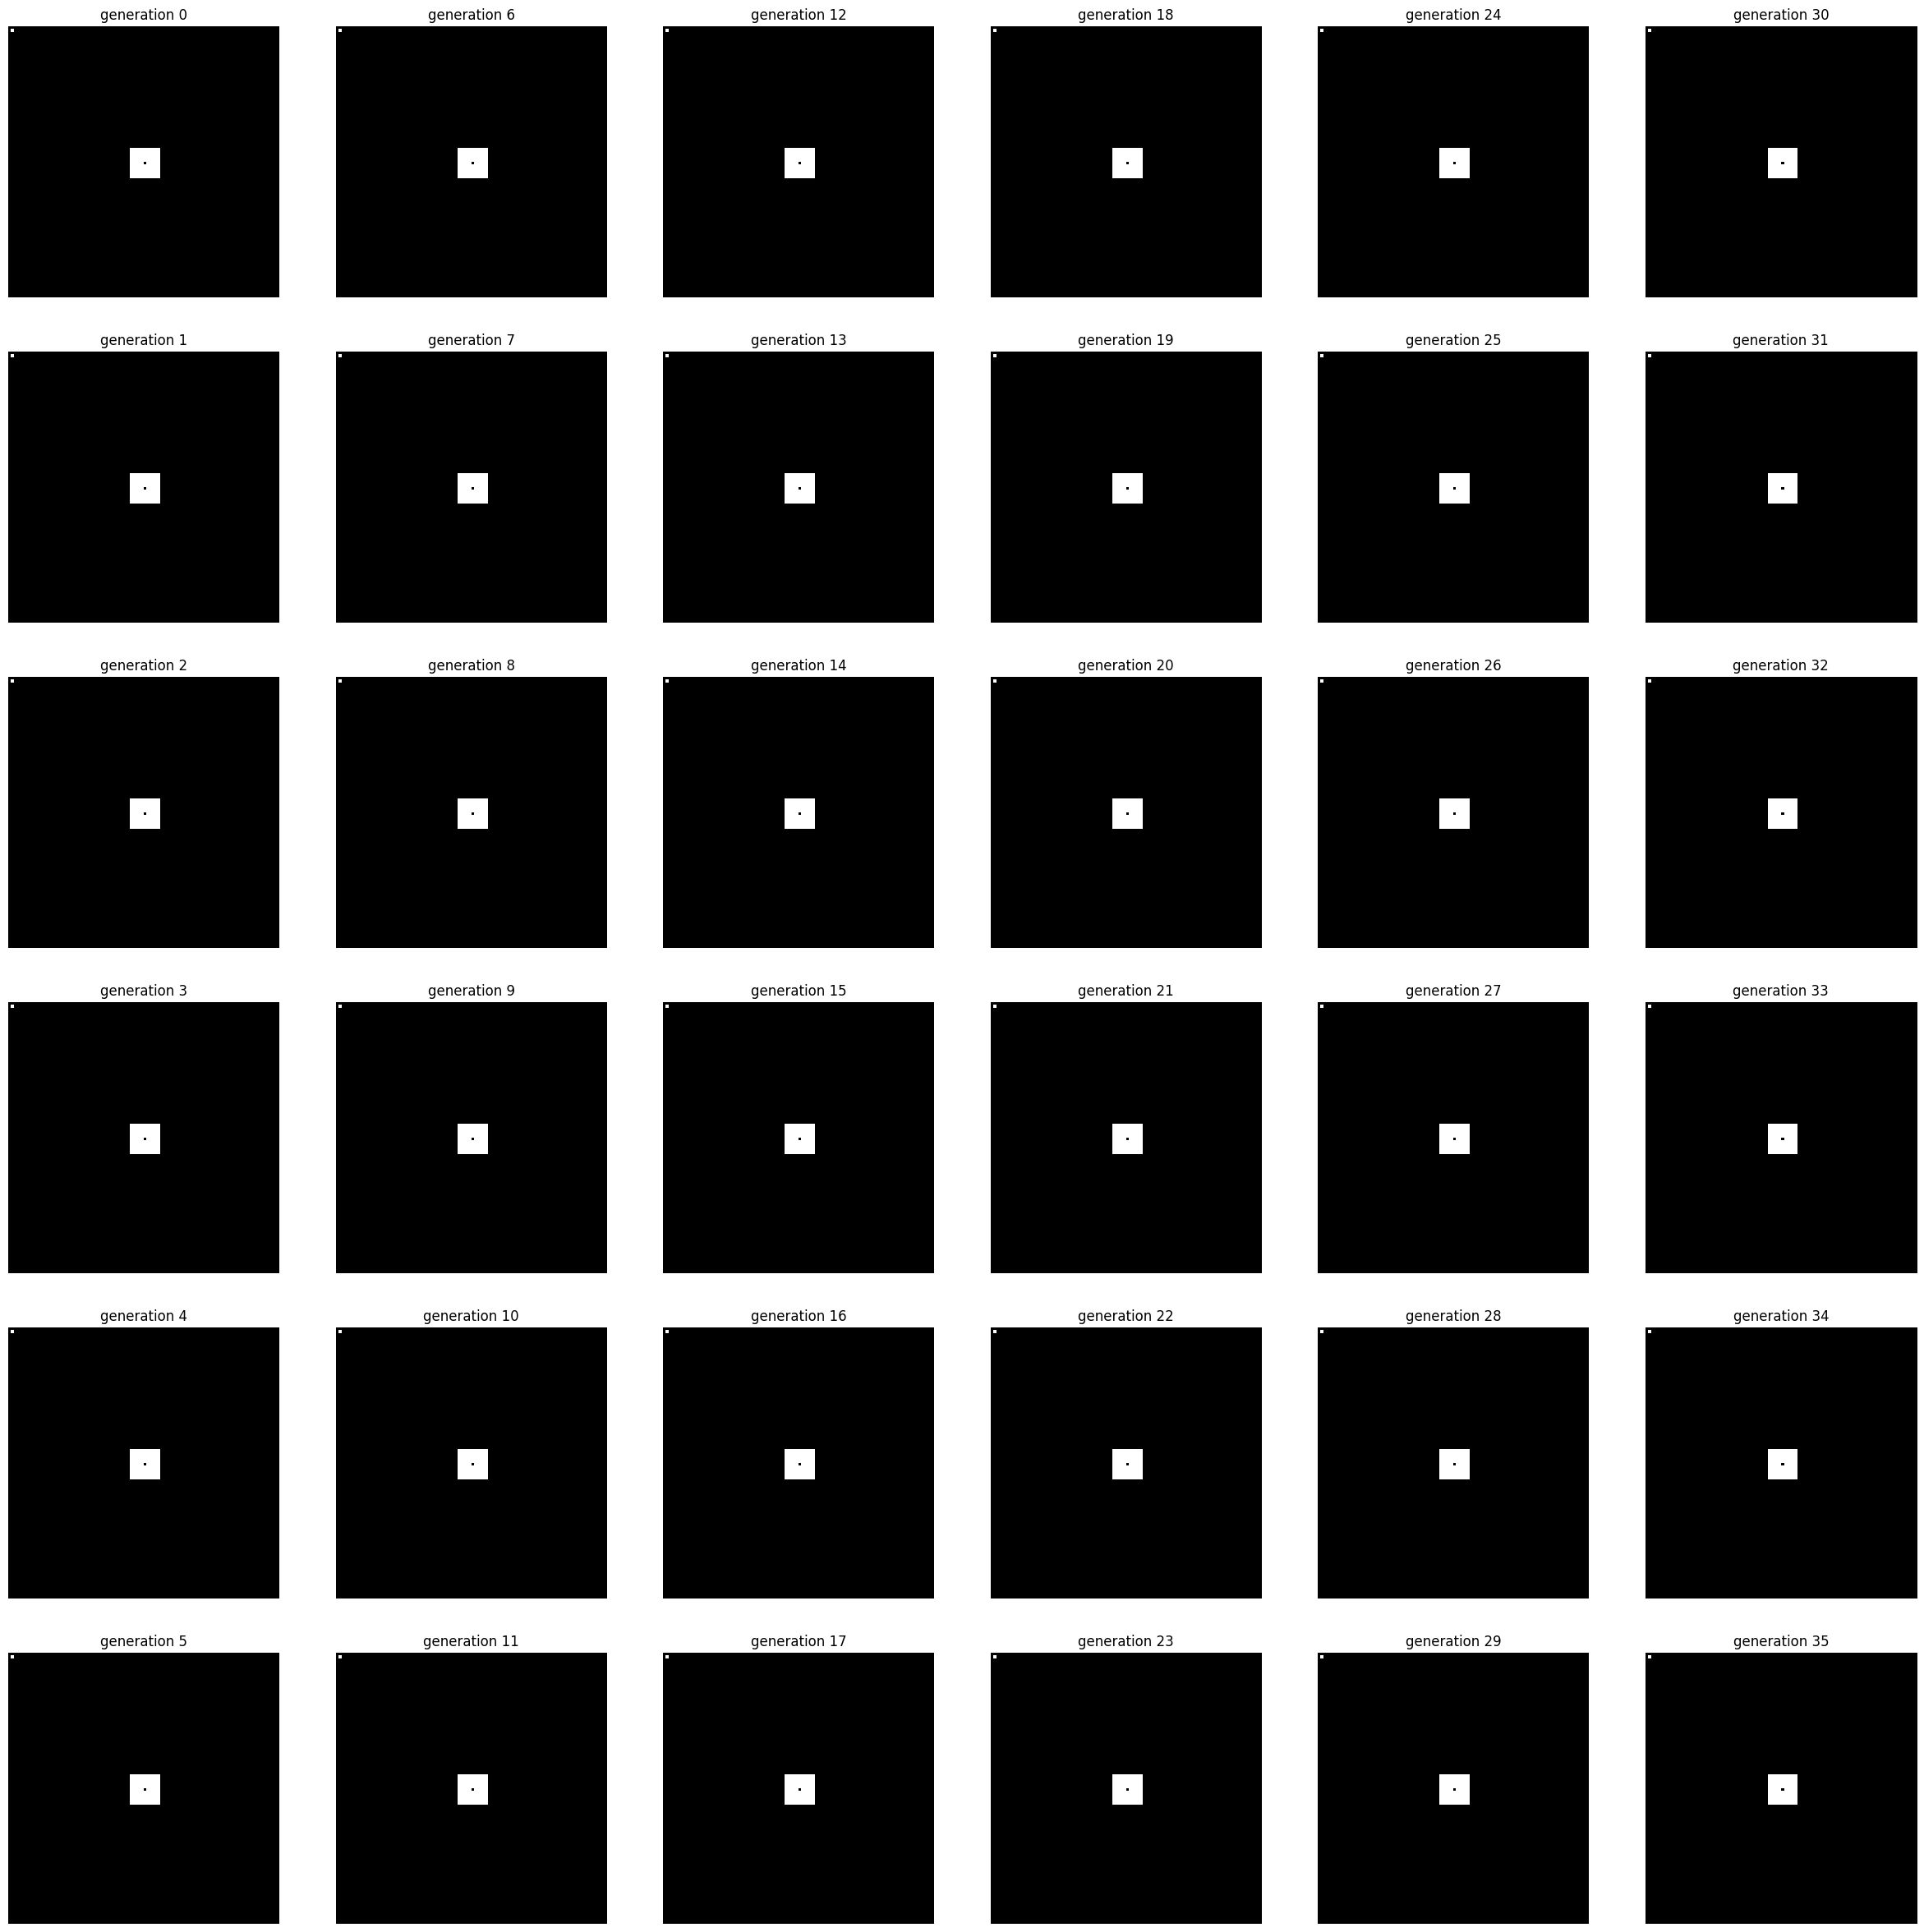

In [29]:
engine.visualize()